In [7]:
import pandas as pd

df = pd.read_csv('student_data.csv')

print(df.head())

print(df.info())
print(df.describe())

     Name  Math  Science  English  History
0    Aman    78       82       75       70
1     Ben    88       90       92       85
2  Chirag    65       60       70       68
3   Divya    95       92       96       94
4    Esha    50       55       58       52
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     10 non-null     object
 1   Math     10 non-null     int64 
 2   Science  10 non-null     int64 
 3   English  10 non-null     int64 
 4   History  10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes
None
            Math    Science    English    History
count  10.000000  10.000000  10.000000  10.000000
mean   72.800000  73.400000  75.700000  73.400000
std    17.364075  15.457469  15.627966  15.342027
min    45.000000  50.000000  48.000000  52.000000
25%    61.250000  60.500000  66.250000  62.000000
50%    75.000000  77.5

In [8]:
## Check for missng values
print(df.isnull().sum())

Name       0
Math       0
Science    0
English    0
History    0
dtype: int64


In [11]:
## ADD total and average columns

df['Total'] = df[['Math', 'Science', 'English', 'History']].sum(axis=1)
df['Average'] = df['Total'] /4 

## Find Topper
topper = df[df['Total'] == df['Total'].max()]
print("Topper:\n", topper)

Topper:
     Name  Math  Science  English  History  Total  Average
3  Divya    95       92       96       94    377    94.25


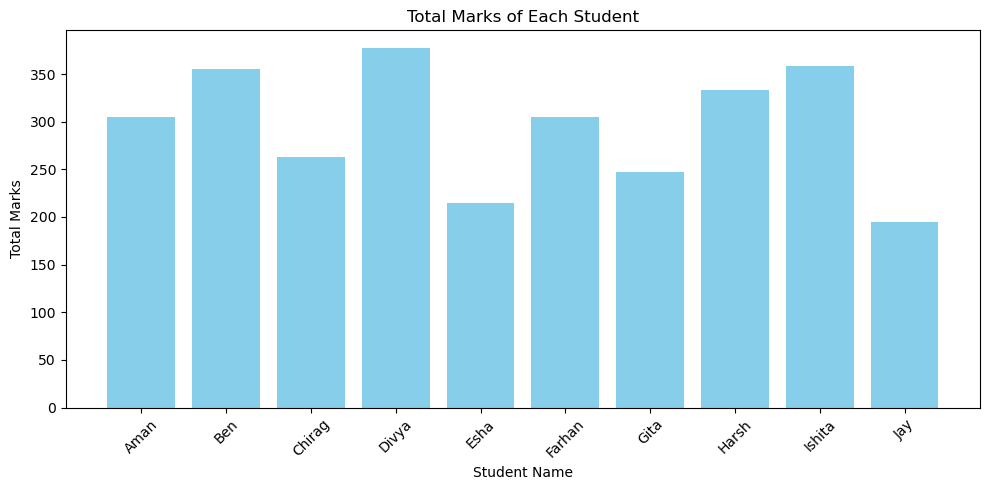

In [17]:
## Visualizing Data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df['Name'], df['Total'], color ='skyblue')
plt.title('Total Marks of Each Student')
plt.xlabel('Student Name')
plt.ylabel('Total Marks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

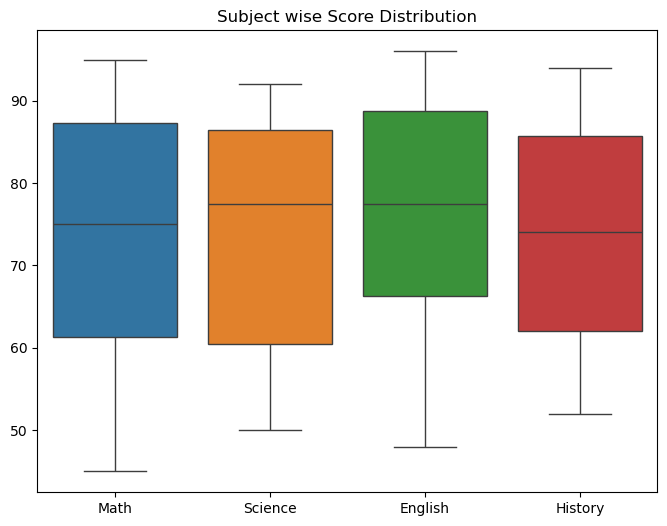

In [18]:
## Box plot - subject wise performance

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Math', 'Science', 'English', 'History']])
plt.title("Subject wise Score Distribution")
plt.show()

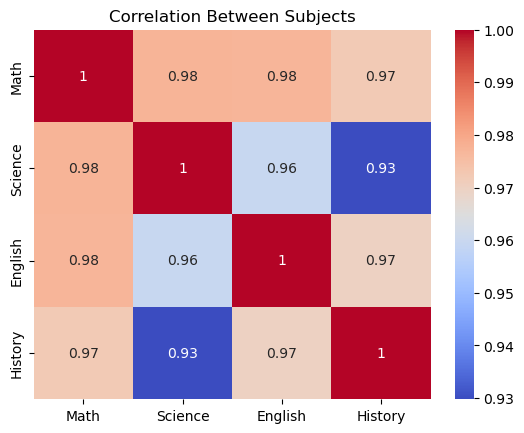

In [19]:
## heatmap - Correlation Between subjects

plt.Figure(figsize=(8, 6))
sns.heatmap(df[['Math', 'Science', 'English', 'History']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Subjects")
plt.show()


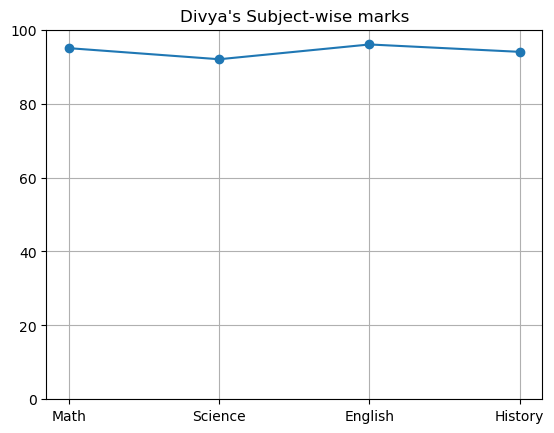

In [21]:
## Lineplot -Track One Student Progress(eg Divya)

divya = df[df['Name'] == 'Divya'].iloc[0]
subjects = ['Math', 'Science', 'English', 'History']
scores = [divya[sub] for sub in subjects]

plt.plot(subjects, scores, marker='o')
plt.title("Divya's Subject-wise marks")
plt.ylim(0, 100)
plt.grid(True)
plt.show()

In [23]:
## Save the dataframe with Total and Average
df.to_csv('Student_marks_analyzed.csv', index=False)